# Goal: Predict a Profitable DraftKings Fantasy Basketball Lineup.

<a href="http://www.youtube.com/watch?feature=player_embedded&v=uPfJpdKkrkU
" target="_blank"><img src="DraftKings_logo.jpg" 
alt="IMAGE ALT TEXT HERE" width="50%" height="50%" border="10" /></a>

### Data collected from FantasyCruncher, RotoGuru and ESPN.  Two regression models (simple linear regression and Keras) have been created.

### Assumption is that past performance will determine the highest scoring players on a daily basis.



# EDA 

In [888]:
# Bring in Imports

import pandas as pd
import numpy as np
import re

# A data legend and other notes about this file can be found in rotoguru1.com/hoop/nba-dhd-2018-notes.txt

# Data obtained from RotoGuru for 2017-2018 Season for Fantasy Basketball Players.

# Data is separated by ':'

# Use delimiter=':' to separate into columns.


# use pd.read_csv to load the previous DraftKings data and assign to variable 'nba_2017'

nba_2017 = pd.read_csv('DK_2017-2018.csv', delimiter=':')



In [889]:
# view the columns in nba_2017

nba_2017.columns

Index(['GID', 'Last, First', 'First  Last', 'Date', 'Team', 'Opp', 'H/A',
       'GameID', 'GTime(ET)', 'Team pts', 'Opp pts', 'Start', 'Minutes', 'GP',
       'active', 'FDP', 'DKP', 'DDP', 'YHP', 'Stats', 'DoubleD', 'TripleD',
       'FD Sal', 'FD Change', 'DK Sal', 'DK Change', 'DD Sal', 'DD Change',
       'YH Sal', 'YH Change', 'FD pos', 'DK pos', 'DD pos', 'YH pos',
       'Unnamed: 34'],
      dtype='object')

In [890]:
# view the data in nba_2017

nba_2017

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,DK Change,DD Sal,DD Change,YH Sal,YH Change,FD pos,DK pos,DD pos,YH pos,Unnamed: 34
0,5153,"Mason III, Frank",Frank Mason III,20171212,sac,pho,H,20171212-pho-sac,22.0,99.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
1,5153,"Mason III, Frank",Frank Mason III,20171210,sac,tor,H,20171210-tor-sac,15.5,87.0,...,200.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
2,5153,"Mason III, Frank",Frank Mason III,20171208,sac,nor,A,20171208-sac-nor,20.0,116.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
3,5153,"Mason III, Frank",Frank Mason III,20171206,sac,cle,A,20171206-sac-cle,19.0,95.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
4,5153,"Mason III, Frank",Frank Mason III,20171202,sac,mil,A,20171202-sac-mil,20.5,104.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
5,5153,"Mason III, Frank",Frank Mason III,20171201,sac,chi,A,20171201-sac-chi,20.0,107.0,...,700.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
6,5153,"Mason III, Frank",Frank Mason III,20171128,sac,mil,H,20171128-mil-sac,22.0,87.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
7,5153,"Mason III, Frank",Frank Mason III,20171127,sac,gsw,A,20171127-sac-gsw,22.5,110.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
8,5153,"Mason III, Frank",Frank Mason III,20171125,sac,lac,H,20171125-lac-sac,22.0,95.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
9,5153,"Mason III, Frank",Frank Mason III,20171122,sac,lal,H,20171122-lal-sac,22.5,113.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN


In [891]:
# See how many columns and rows in the DataFrame.

nba_2017.shape

(13735, 35)

In [892]:
# Locate a single game day to see if the columns are what you need.

nba_2017.loc[nba_2017['Date']== 20171213,:].sort_values('DKP', ascending=False)


,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,DK Change,DD Sal,DD Change,YH Sal,YH Change,FD pos,DK pos,DD pos,YH pos,Unnamed: 34
27,3816,"Williams, Louis",Louis Williams,20171213,lac,orl,A,20171213-lac-orl,19.0,NaN,...,100.0,NaN,NaN,31.0,0.0,2.0,12.0,NaN,2.0,NaN
80,4379,"Irving, Kyrie",Kyrie Irving,20171213,bos,den,H,20171213-den-bos,19.5,NaN,...,-300.0,NaN,NaN,41.0,-2.0,1.0,1.0,NaN,1.0,NaN
193,3670,"Smith, Josh",Josh Smith,20171213,nor,mil,H,20171213-mil-nor,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,4316,"Stephenson, Lance",Lance Stephenson,20171213,ind,okc,H,20171213-okc-ind,19.0,NaN,...,-100.0,NaN,NaN,11.0,-2.0,3.0,23.0,NaN,2.0,NaN
257,4112,"Lopez, Robin",Robin Lopez,20171213,chi,uta,H,20171213-uta-chi,20.0,NaN,...,-200.0,NaN,NaN,19.0,0.0,5.0,5.0,NaN,5.0,NaN
312,4845,"Felicio, Cristiano",Cristiano Felicio,20171213,chi,uta,H,20171213-uta-chi,20.0,NaN,...,0.0,NaN,NaN,10.0,0.0,5.0,45.0,NaN,5.0,NaN
366,4224,"Harden, James",James Harden,20171213,hou,cha,H,20171213-cha-hou,21.5,NaN,...,0.0,NaN,NaN,59.0,0.0,2.0,12.0,NaN,2.0,NaN
419,4717,"Frazier, Tim",Tim Frazier,20171213,was,mem,H,20171213-mem-was,19.0,NaN,...,-100.0,NaN,NaN,10.0,0.0,1.0,1.0,NaN,1.0,NaN
447,4788,"Richardson, Josh",Josh Richardson,20171213,mia,por,H,20171213-por-mia,19.5,NaN,...,-100.0,NaN,NaN,14.0,0.0,3.0,23.0,NaN,3.0,NaN
474,4212,"Holiday, Jrue",Jrue Holiday,20171213,nor,mil,H,20171213-mil-nor,20.0,NaN,...,600.0,NaN,NaN,33.0,2.0,2.0,12.0,NaN,2.0,NaN


In [893]:
# Import the 2017-2018 DraftKings perfect lineups from https://www.fantasycruncher.com/lineup-rewind/draftkings/NBA/

# Read it as a DataFrame

# Assign it to "perfectlineup"

perfectlineup = pd.read_csv('NBA 2017-2018.csv')

In [894]:
# view the head of perfectlineup
perfectlineup.tail()

,Date,PG,SG,SF,PF,C,G,F,UTIL
51,12/9/2017,Shelvin Mack (0),Kent Bazemore (0),Tyreke Evans (0),Mike Scott (0),Nikola Vucevic (0),Jonathon Simmons (0),Otto Porter (0),Giannis Antetokounmpo (0)
52,12/10/2017,Jrue Holiday (0),Victor Oladipo (0),Trey Lyles (0),Wilson Chandler (0),Myles Turner (0),Rajon Rondo (0),Ersan Ilyasova (0),Kristaps Porzingis (0)
53,12/11/2017,James Harden (0),Chris Paul (0),Michael Kidd-Gilchrist (0),Nikola Mirotic (0),Jonas Valanciunas (0),Jrue Holiday (0),E'Twaun Moore (0),Rajon Rondo (0)
54,12/12/2017,George Hill (0),Spencer Dinwiddie (0),Kent Bazemore (0),Kristaps Porzingis (0),Karl-Anthony Towns (0),Jimmy Butler (0),Taurean Prince (0),Richaun Holmes (0)
55,12/13/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [895]:
# Use regex to replace the (0)'s with '' in each perfectlineup cell.
# reassign to their columns.

perfectlineup['PG'] = perfectlineup['PG'].replace('[(0)]', '',regex=True)
perfectlineup['SG'] = perfectlineup['SG'].replace('[(0)]', '',regex=True)
perfectlineup['SF'] = perfectlineup['SF'].replace('[(0)]', '',regex=True)
perfectlineup['PF'] = perfectlineup['PF'].replace('[(0)]', '',regex=True)
perfectlineup['C'] = perfectlineup['C'].replace('[(0)]', '',regex=True)
perfectlineup['G'] = perfectlineup['G'].replace('[(0)]', '',regex=True)
perfectlineup['F'] = perfectlineup['F'].replace('[(0)]', '',regex=True)
perfectlineup['UTIL'] = perfectlineup['UTIL'].replace('[(0)]', '',regex=True)

# Use regex to replace the space at the end of each name with '' in each perfectlineup cell.
# reassign to perfectlineup.

perfectlineup = perfectlineup.replace('\s+$', '',regex=True)

# convert the Date column to timeseries
# reassign to perfectlineup['Date']
# Sort the values of perfectlineup in ascending order by the date.

perfectlineup['Date'] = pd.to_datetime(perfectlineup.Date)
perfectlineup.sort_values('Date')

# View "perfectlineup"
perfectlineup


,Date,PG,SG,SF,PF,C,G,F,UTIL
0,2017-10-17,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
1,2017-10-18,Darren Collison,Dillon Brooks,Tobias Harris,Thaddeus Young,Hassan Whiteside,Giannis Antetokounmpo,Robert Covington,Clint Capela
2,2017-10-19,Russell Westbrook,C.J. Miles,Larry Nance Jr.,Kristaps Porzingis,Jonas Valanciunas,Delon Wright,Blake Griffin,Robin Lopez
3,2017-10-20,Spencer Dinwiddie,Evan Fournier,Otto Porter,Al-Farouq Aminu,Nikola Vucevic,Lonzo Ball,Anthony Davis,T.J. Warren
4,2017-10-21,Victor Oladipo,D.J. Augustin,Giannis Antetokounmpo,James Johnson,Marc Gasol,Iman Shumpert,Kevin Durant,Domantas Sabonis
5,2017-10-22,D'Angelo Russell,Jordan Clarkson,Caris LeVert,John Collins,Steven Adams,Jeff Teague,Andrew Wiggins,Anthony Davis
6,2017-10-23,Dejounte Murray,Eric Gordon,Ben Simmons,Otto Porter,Dwight Howard,Danny Green,Giannis Antetokounmpo,Mike James
7,2017-10-24,Cory Joseph,Evan Fournier,LeBron James,Aaron Gordon,DeMarcus Cousins,Darren Collison,Thabo Sefolosha,Jamal Crawford
8,2017-10-25,T.J. McConnell,Spencer Dinwiddie,Tobias Harris,Jeff Green,Clint Capela,Russell Westbrook,LeBron James,Brandon Ingram
9,2017-10-26,Giannis Antetokounmpo,Denzel Valentine,Al-Farouq Aminu,Al Horford,Mike Muscala,Jameer Nelson,Jarell Martin,DeMarcus Cousins


In [896]:
# View the unique dates in perfectlineup

perfectlineup['Date'].unique()


array(['2017-10-17T00:00:00.000000000', '2017-10-18T00:00:00.000000000',
       '2017-10-19T00:00:00.000000000', '2017-10-20T00:00:00.000000000',
       '2017-10-21T00:00:00.000000000', '2017-10-22T00:00:00.000000000',
       '2017-10-23T00:00:00.000000000', '2017-10-24T00:00:00.000000000',
       '2017-10-25T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2017-10-27T00:00:00.000000000', '2017-10-28T00:00:00.000000000',
       '2017-10-29T00:00:00.000000000', '2017-10-30T00:00:00.000000000',
       '2017-10-31T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-11-02T00:00:00.000000000', '2017-11-03T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2017-11-05T00:00:00.000000000',
       '2017-11-06T00:00:00.000000000', '2017-11-07T00:00:00.000000000',
       '2017-11-08T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-10T00:00:00.000000000', '2017-11-11T00:00:00.000000000',
       '2017-11-12T00:00:00.000000000', '2017-11-13

In [1247]:
# Perform value counts for the Point Guard position.

perfectlineup['PG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

James Harden         7
Russell Westbrook    5
Stephen Curry        2
Jeff Teague          2
Kyle Lowry           2
Name: PG, dtype: int64

In [1248]:
# Perform value counts for the Shooting Guard position.

perfectlineup['SG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Spencer Dinwiddie    4
Victor Oladipo       3
Devin Booker         3
Evan Fournier        2
Austin Rivers        2
Name: SG, dtype: int64

In [1249]:
# Perform value counts for the Small Forward position.

perfectlineup['SF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Kent Bazemore      3
Tyreke Evans       3
Devin Booker       3
LeBron James       3
Khris Middleton    3
Name: SF, dtype: int64

In [1250]:
# Perform value counts for the Power Forward position.

perfectlineup['PF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Otto Porter           3
Greg Monroe           3
LeBron James          2
Kristaps Porzingis    2
Aaron Gordon          2
Name: PF, dtype: int64

In [1251]:
# Perform value counts for the Guard position.

perfectlineup['G'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Jimmy Butler     4
Kyle Lowry       3
Lonzo Ball       2
Jeff Teague      2
Stephen Curry    2
Name: G, dtype: int64

In [1252]:
# Perform value counts for the Forward position.

perfectlineup['F'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Zach Randolph      3
Thabo Sefolosha    3
Brandon Ingram     3
E'Twaun Moore      2
Devin Booker       2
Name: F, dtype: int64

In [1253]:
# Perform value counts for the Center position.

perfectlineup['C'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()


Andre Drummond        6
Dwight Howard         4
Nikola Vucevic        4
Jusuf Nurkic          4
Karl-Anthony Towns    3
Name: C, dtype: int64

In [1254]:
# Perform value counts for the Utility position.

perfectlineup['UTIL'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Nikola Jokic           3
Brook Lopez            2
Damian Lillard         2
Kristaps Porzingis     2
Willie Cauley-Stein    2
Name: UTIL, dtype: int64

In [905]:
# Import the 2017-2018 Defensive Real Plus Minus from http://www.espn.com/nba/statistics/rpm/_/year/2018/sort/DRPM

# Read it as a DataFrame

# Assign it to "drpm"

drpm = pd.read_csv('drpm.csv', delimiter=',')

In [906]:
# print the head of drpm

drpm.head()

,RK,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,1,"Vince Carter, SG",SAC,12.0,12.0,-1.82,0.16,-1.66,0.10
1,2,"Jamal Crawford, SG",MIN,22.0,17.4,-0.04,-2.12,-2.16,0.22
2,3,"Manu Ginobili, SG",SA,18.0,20.1,-0.97,-0.83,-1.80,0.27
3,4,"Dirk Nowitzki, PF",DAL,22.0,24.9,0.17,0.59,0.76,1.20
4,5,"Jason Terry, SG",MIL,7.0,8.4,-1.33,-0.58,-1.91,0.03


In [907]:
# Use replace to strip out everything from the "," on in the 'NAME' column.

drpm['NAME'] = drpm['NAME'].str.replace('\,.*', "")

# print the head of drpm

drpm.head()

,RK,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,1,Vince Carter,SAC,12.0,12.0,-1.82,0.16,-1.66,0.10
1,2,Jamal Crawford,MIN,22.0,17.4,-0.04,-2.12,-2.16,0.22
2,3,Manu Ginobili,SA,18.0,20.1,-0.97,-0.83,-1.80,0.27
3,4,Dirk Nowitzki,DAL,22.0,24.9,0.17,0.59,0.76,1.20
4,5,Jason Terry,MIL,7.0,8.4,-1.33,-0.58,-1.91,0.03


In [908]:
# Revise nba_2017 to only include the data you need.

# Reassign it to "nba_2017_revised"

nba_2017_revised = nba_2017[['Date', 'First  Last', 'Stats', 'Minutes', 'DKP', 'Team', 'Opp']]

In [909]:
# View "nba_2017_revised" head

nba_2017_revised.head()

# 'Stats' needs to be stripped and new columns created with pertinent data.

,Date,First Last,Stats,Minutes,DKP,Team,Opp
0,20171212,Frank Mason III,6pt 4rb 4as 1st 1bl 1to 2-8fg 2-2ft,26.783333,20.50,sac,pho
1,20171210,Frank Mason III,6pt 2rb 3as 1-10fg 4-5ft,24.633333,13.00,sac,tor
2,20171208,Frank Mason III,12pt 5rb 3as 1st 4to 1trey 4-10fg 3-4ft,25.516667,23.25,sac,nor
3,20171206,Frank Mason III,15pt 2rb 2as 3st 2to 1trey 4-6fg 6-10ft,19.166667,26.00,sac,cle
4,20171202,Frank Mason III,13pt 1rb 3as 1to 1trey 4-6fg 4-4ft,23.383333,18.75,sac,mil


In [910]:
# Locate a single day and sort by highest DKP (DraftKing Points) and sanity check the amounts.

nba_2017_revised.loc[nba_2017_revised['Date']== 20171212,:].sort_values('DKP', ascending=False).head(25)

,Date,First Last,Stats,Minutes,DKP,Team,Opp
4372,20171212,Kristaps Porzingis,37pt 11rb 1as 1st 5bl 3to 5trey 14-26fg 4-5ft,40.083333,66.75,nyk,lal
912,20171212,LeBron James,25pt 7rb 17as 2st 2to 2trey 11-13fg 1-2ft,35.016667,64.75,cle,atl
12496,20171212,Joel Embiid,28pt 12rb 8as 1bl 2to 1trey 8-16fg 11-12ft,39.433333,58.00,phi,min
7705,20171212,Karl-Anthony Towns,19pt 16rb 2as 4st 3bl 1to 6-16fg 7-10ft,48.116667,57.00,min,phi
5047,20171212,Jimmy Butler,38pt 6rb 3as 1st 1to 3trey 15-33fg 5-5ft,45.500000,53.00,min,phi
1174,20171212,Kent Bazemore,20pt 8rb 5as 2st 2bl 3to 6trey 7-13fg,27.800000,47.00,atl,cle
3233,20171212,Spencer Dinwiddie,11pt 6rb 12as 2st 1bl 3to 1trey 4-14fg 2-4ft,32.283333,43.00,bkn,was
2204,20171212,Lonzo Ball,17pt 8rb 6as 2st 1bl 1to 3trey 6-13fg 2-3ft,39.516667,43.00,lal,nyk
3333,20171212,LaMarcus Aldridge,23pt 13rb 2as 3to 9-23fg 5-6ft,38.000000,42.25,sas,dal
4788,20171212,Taurean Prince,24pt 7rb 6as 2to 2trey 8-10fg 6-6ft,29.900000,41.75,atl,cle


In [911]:
# Inner join nba_2017 and drpm on the respective columns that hold the names of each player.

# Reassign to "nba_2017_2"

nba_2017_2=pd.merge(nba_2017,drpm,left_on='First  Last',right_on='NAME')

In [912]:
# View  the tail of "nba_2017_2"

nba_2017_2.tail()

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,Unnamed: 34,RK,NAME,TEAM,GP_y,MPG,ORPM,DRPM,RPM,WINS
11410,4817,"Cauley-Stein, Willie",Willie Cauley-Stein,20171026,sac,nor,H,20171026-nor-sac,22.5,106.0,...,NaN,302,Willie Cauley-Stein,SAC,21.0,25.4,-1.97,0.55,-1.42,0.51
11411,4817,"Cauley-Stein, Willie",Willie Cauley-Stein,20171023,sac,pho,A,20171023-sac-pho,22.0,115.0,...,NaN,302,Willie Cauley-Stein,SAC,21.0,25.4,-1.97,0.55,-1.42,0.51
11412,4817,"Cauley-Stein, Willie",Willie Cauley-Stein,20171021,sac,den,A,20171021-sac-den,21.0,79.0,...,NaN,302,Willie Cauley-Stein,SAC,21.0,25.4,-1.97,0.55,-1.42,0.51
11413,4817,"Cauley-Stein, Willie",Willie Cauley-Stein,20171020,sac,dal,A,20171020-sac-dal,20.5,93.0,...,NaN,302,Willie Cauley-Stein,SAC,21.0,25.4,-1.97,0.55,-1.42,0.51
11414,4817,"Cauley-Stein, Willie",Willie Cauley-Stein,20171018,sac,hou,H,20171018-hou-sac,22.0,100.0,...,NaN,302,Willie Cauley-Stein,SAC,21.0,25.4,-1.97,0.55,-1.42,0.51


In [913]:
# Select a single game day and view the columns.

nba_2017_2.columns

Index(['GID', 'Last, First', 'First  Last', 'Date', 'Team', 'Opp', 'H/A',
       'GameID', 'GTime(ET)', 'Team pts', 'Opp pts', 'Start', 'Minutes',
       'GP_x', 'active', 'FDP', 'DKP', 'DDP', 'YHP', 'Stats', 'DoubleD',
       'TripleD', 'FD Sal', 'FD Change', 'DK Sal', 'DK Change', 'DD Sal',
       'DD Change', 'YH Sal', 'YH Change', 'FD pos', 'DK pos', 'DD pos',
       'YH pos', 'Unnamed: 34', 'RK', 'NAME', 'TEAM', 'GP_y', 'MPG', 'ORPM',
       'DRPM', 'RPM', 'WINS'],
      dtype='object')

In [914]:
# Setup columns in the order I would like to see them in. Stats still needs to be stripped.

nba_2017_2 = nba_2017_2[['First  Last', 'Date', 'DK Sal', 'GID', 'Team', 'Opp', 'Start', 'H/A', 'Minutes', 'DKP', 'Team pts','Stats', 'DoubleD', 'TripleD', 'DK pos', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS']]

In [915]:
# Import re

import re

# Strip out "Stats" and assign each individual stat to its own column.

# Credit to piRSquared for guiding me through the process:
# https://stackoverflow.com/questions/46996602/pandas-dataframe-add-a-column-based-on-a-string

pat = lambda x: re.match('^(.+?)([a-z]+)$', x).groups()
prs = lambda s: pd.Series(*zip(*[pat(x) for x in s.split()]))

# Reassign to nba2017strip

nba2017strip = nba_2017_2.drop('Stats', 1).join(nba_2017_2.Stats.fillna('').apply(prs))

# View "nba2017strip"

nba2017strip.head(25)

,First Last,Date,DK Sal,GID,Team,Opp,Start,H/A,Minutes,DKP,...,WINS,as,bl,fg,ft,pt,rb,st,to,trey
0,Frank Mason III,20171212,3900.0,5153,sac,pho,0.0,H,26.783333,20.50,...,0.09,4,1,2-8,2-2,6,4,1,1,NaN
1,Frank Mason III,20171210,3900.0,5153,sac,tor,0.0,H,24.633333,13.00,...,0.09,3,NaN,1-10,4-5,6,2,NaN,NaN,NaN
2,Frank Mason III,20171208,3700.0,5153,sac,nor,0.0,A,25.516667,23.25,...,0.09,3,NaN,4-10,3-4,12,5,1,4,1
3,Frank Mason III,20171206,3700.0,5153,sac,cle,0.0,A,19.166667,26.00,...,0.09,2,NaN,4-6,6-10,15,2,3,2,1
4,Frank Mason III,20171202,3700.0,5153,sac,mil,0.0,A,23.383333,18.75,...,0.09,3,NaN,4-6,4-4,13,1,NaN,1,1
5,Frank Mason III,20171201,3700.0,5153,sac,chi,0.0,A,15.733333,12.25,...,0.09,4,NaN,1-6,2-2,5,1,NaN,1,1
6,Frank Mason III,20171128,3000.0,5153,sac,mil,0.0,H,24.033333,21.50,...,0.09,7,NaN,3-9,2-2,8,2,1,3,NaN
7,Frank Mason III,20171127,3000.0,5153,sac,gsw,0.0,A,24.933333,24.75,...,0.09,4,NaN,5-10,2-2,14,3,NaN,NaN,2
8,Frank Mason III,20171125,3000.0,5153,sac,lac,0.0,H,9.900000,7.50,...,0.09,1,NaN,2-2,1-1,5,2,NaN,3,NaN
9,Frank Mason III,20171122,3000.0,5153,sac,lal,0.0,H,26.166667,27.75,...,0.09,7,NaN,4-7,1-1,11,5,NaN,2,2


In [916]:
# view the datatypes in nba2017strip

nba2017strip.dtypes

First  Last     object
Date             int64
DK Sal         float64
GID              int64
Team            object
Opp             object
Start          float64
H/A             object
Minutes        float64
DKP            float64
Team pts       float64
DoubleD        float64
TripleD        float64
DK pos         float64
MPG            float64
ORPM           float64
DRPM           float64
RPM            float64
WINS           float64
as              object
bl              object
fg              object
ft              object
pt              object
rb              object
st              object
to              object
trey            object
dtype: object

In [917]:
# Fill in NA's with 0's.

nba2017strip = nba2017strip.fillna(0)

In [918]:
# Use .astype to convert string columns that you want to make into possible features into integers

nba2017strip['as'] = nba2017strip['as'].astype(int)
nba2017strip['bl'] = nba2017strip['bl'].astype(int)

nba2017strip['pt'] = nba2017strip['pt'].astype(int)
nba2017strip['rb'] = nba2017strip['rb'].astype(int)
nba2017strip['st'] = nba2017strip['st'].astype(int)
nba2017strip['to'] = nba2017strip['to'].astype(int)
nba2017strip['trey'] = nba2017strip['trey'].astype(int)
nba2017strip['GID'] = nba2017strip['GID'].astype(int)


In [919]:
# Use .str.extract to create new column for field goal attempts and field goals made.
# Use .str.extract to create new column for free throw attempts and freet throws made.


nba2017strip[['ftm', 'fta']] = nba2017strip['ft'].str.extract('(\d+)-(\d+)', expand=True)
nba2017strip[['fgm', 'fga']] = nba2017strip['fg'].str.extract('(\d+)-(\d+)', expand=True)


In [920]:
# Use pandas to_datetime to convert 'Date' to time series.

nba2017strip['Date'] = pd.to_datetime(nba2017strip['Date'], format='%Y%m%d', errors='ignore')

In [921]:
# nba2017strip['Date'] = pd.to_datetime(nba2017strip.Date)
# Sort by date
nba2017strip.sort_values('Date')

,First Last,Date,DK Sal,GID,Team,Opp,Start,H/A,Minutes,DKP,...,ft,pt,rb,st,to,trey,ftm,fta,fgm,fga
2443,Jabari Bird,2017-10-17,3000.0,5124,bos,cle,0.0,A,0.000000,0.00,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
5176,Andre Iguodala,2017-10-17,3600.0,3641,gsw,hou,0.0,H,0.000000,0.00,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
7563,Kyle Korver,2017-10-17,3300.0,3547,cle,bos,0.0,H,7.316667,0.00,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6577,David West,2017-10-17,3100.0,3573,gsw,hou,0.0,H,9.416667,6.75,...,0,4,1,0,1,0,NaN,NaN,2,3
1149,Jeff Green,2017-10-17,3000.0,3992,cle,bos,0.0,H,14.233333,5.50,...,0,6,0,0,1,0,NaN,NaN,3,8
10349,Shaun Livingston,2017-10-17,3700.0,3651,gsw,hou,0.0,H,18.533333,14.25,...,2-2,6,1,0,1,0,2,2,2,5
7508,Troy Williams,2017-10-17,3000.0,4908,hou,gsw,0.0,A,0.000000,0.00,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
739,LeBron James,2017-10-17,10200.0,3541,cle,bos,1.0,H,41.200000,66.50,...,4-4,29,16,0,4,1,4,4,12,19
2983,Daniel Theis,2017-10-17,3000.0,5114,bos,cle,0.0,A,0.000000,0.00,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
547,Bobby Brown,2017-10-17,3800.0,4087,hou,gsw,0.0,A,0.000000,0.00,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [922]:
# Fill in NaN's with 0's.

nba2017strip = nba2017strip.fillna(0)

# Drop 'fg' and 'ft' columns
nba2017strip.drop('fg', axis=1)
nba2017strip.drop('ft', axis=1)

,First Last,Date,DK Sal,GID,Team,Opp,Start,H/A,Minutes,DKP,...,fg,pt,rb,st,to,trey,ftm,fta,fgm,fga
0,Frank Mason III,2017-12-12,3900.0,5153,sac,pho,0.0,H,26.783333,20.50,...,2-8,6,4,1,1,0,2,2,2,8
1,Frank Mason III,2017-12-10,3900.0,5153,sac,tor,0.0,H,24.633333,13.00,...,1-10,6,2,0,0,0,4,5,1,10
2,Frank Mason III,2017-12-08,3700.0,5153,sac,nor,0.0,A,25.516667,23.25,...,4-10,12,5,1,4,1,3,4,4,10
3,Frank Mason III,2017-12-06,3700.0,5153,sac,cle,0.0,A,19.166667,26.00,...,4-6,15,2,3,2,1,6,10,4,6
4,Frank Mason III,2017-12-02,3700.0,5153,sac,mil,0.0,A,23.383333,18.75,...,4-6,13,1,0,1,1,4,4,4,6
5,Frank Mason III,2017-12-01,3700.0,5153,sac,chi,0.0,A,15.733333,12.25,...,1-6,5,1,0,1,1,2,2,1,6
6,Frank Mason III,2017-11-28,3000.0,5153,sac,mil,0.0,H,24.033333,21.50,...,3-9,8,2,1,3,0,2,2,3,9
7,Frank Mason III,2017-11-27,3000.0,5153,sac,gsw,0.0,A,24.933333,24.75,...,5-10,14,3,0,0,2,2,2,5,10
8,Frank Mason III,2017-11-25,3000.0,5153,sac,lac,0.0,H,9.900000,7.50,...,2-2,5,2,0,3,0,1,1,2,2
9,Frank Mason III,2017-11-22,3000.0,5153,sac,lal,0.0,H,26.166667,27.75,...,4-7,11,5,0,2,2,1,1,4,7


In [923]:
# View the head of nba2017strip

nba2017strip.head()

,First Last,Date,DK Sal,GID,Team,Opp,Start,H/A,Minutes,DKP,...,ft,pt,rb,st,to,trey,ftm,fta,fgm,fga
0,Frank Mason III,2017-12-12,3900.0,5153,sac,pho,0.0,H,26.783333,20.50,...,2-2,6,4,1,1,0,2,2,2,8
1,Frank Mason III,2017-12-10,3900.0,5153,sac,tor,0.0,H,24.633333,13.00,...,4-5,6,2,0,0,0,4,5,1,10
2,Frank Mason III,2017-12-08,3700.0,5153,sac,nor,0.0,A,25.516667,23.25,...,3-4,12,5,1,4,1,3,4,4,10
3,Frank Mason III,2017-12-06,3700.0,5153,sac,cle,0.0,A,19.166667,26.00,...,6-10,15,2,3,2,1,6,10,4,6
4,Frank Mason III,2017-12-02,3700.0,5153,sac,mil,0.0,A,23.383333,18.75,...,4-4,13,1,0,1,1,4,4,4,6


In [924]:
# Reassign "nba2017strip" to just the columns you want to see.

nba2017strip = nba2017strip[['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'ORPM', 'RPM', 'WINS', 'DK pos']] 


In [925]:
# View the columns to make sure they are the ones you want.

nba2017strip.columns

Index(['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts',
       'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta',
       'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM',
       'ORPM', 'RPM', 'WINS', 'DK pos'],
      dtype='object')

In [926]:
# View the head of nba2017strip

nba2017strip.head()


,GID,Date,First Last,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,st,to,trey,DoubleD,TripleD,DRPM,ORPM,RPM,WINS,DK pos
0,5153,2017-12-12,Frank Mason III,3900.0,sac,pho,99.0,0.0,H,26.783333,...,1,1,0,0.0,0.0,-1.7,-0.63,-2.33,0.09,12.0
1,5153,2017-12-10,Frank Mason III,3900.0,sac,tor,87.0,0.0,H,24.633333,...,0,0,0,0.0,0.0,-1.7,-0.63,-2.33,0.09,12.0
2,5153,2017-12-08,Frank Mason III,3700.0,sac,nor,116.0,0.0,A,25.516667,...,1,4,1,0.0,0.0,-1.7,-0.63,-2.33,0.09,12.0
3,5153,2017-12-06,Frank Mason III,3700.0,sac,cle,95.0,0.0,A,19.166667,...,3,2,1,0.0,0.0,-1.7,-0.63,-2.33,0.09,12.0
4,5153,2017-12-02,Frank Mason III,3700.0,sac,mil,104.0,0.0,A,23.383333,...,0,1,1,0.0,0.0,-1.7,-0.63,-2.33,0.09,12.0


In [927]:
# View a single day and reassign to "nba2017loc2" and sanity check.

nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-12-12',:].sort_values('DKP', ascending=False)
nba2017loc2                                                                                                           
                                                                                                                      

,GID,Date,First Last,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,st,to,trey,DoubleD,TripleD,DRPM,ORPM,RPM,WINS,DK pos
3744,4871,2017-12-12,Kristaps Porzingis,8500.0,nyk,lal,113.0,1.0,H,40.083333,...,1,3,5,1.0,0.0,0.45,1.49,1.94,1.85,45.0
712,3541,2017-12-12,LeBron James,11800.0,cle,atl,123.0,1.0,H,35.016667,...,2,2,2,1.0,0.0,-0.55,5.23,4.68,3.64,34.0
10486,4762,2017-12-12,Joel Embiid,10100.0,phi,min,118.0,1.0,A,39.433333,...,0,2,1,1.0,0.0,2.85,0.32,3.17,1.92,5.0
6659,4879,2017-12-12,Karl-Anthony Towns,8700.0,min,phi,112.0,1.0,H,48.116667,...,4,1,0,1.0,0.0,-1.77,1.72,-0.05,1.38,5.0
4352,4363,2017-12-12,Jimmy Butler,8000.0,min,phi,112.0,1.0,H,45.500000,...,1,1,3,0.0,0.0,0.64,1.16,1.80,2.05,2.0
943,4507,2017-12-12,Kent Bazemore,5300.0,atl,cle,114.0,1.0,A,27.800000,...,2,3,6,0.0,0.0,0.48,-0.02,0.46,1.28,23.0
1945,5215,2017-12-12,Lonzo Ball,6600.0,lal,nyk,109.0,1.0,A,39.516667,...,2,1,3,0.0,0.0,0.76,-2.39,-1.63,0.64,1.0
2746,4760,2017-12-12,Spencer Dinwiddie,6100.0,bkn,was,103.0,1.0,H,32.283333,...,2,3,1,1.0,0.0,-0.05,2.97,2.92,1.79,12.0
2846,3860,2017-12-12,LaMarcus Aldridge,8300.0,sas,dal,89.0,1.0,A,38.000000,...,0,3,0,1.0,0.0,0.69,0.74,1.43,1.79,45.0
4128,4938,2017-12-12,Taurean Prince,5400.0,atl,cle,114.0,1.0,A,29.900000,...,0,2,2,0.0,0.0,-0.45,-1.06,-1.51,0.65,23.0


In [928]:
# View the columns of nba2017strip

nba2017strip.columns

Index(['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts',
       'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta',
       'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM',
       'ORPM', 'RPM', 'WINS', 'DK pos'],
      dtype='object')

In [929]:
# Use a lambda function to convert Home games to 1 and Away games to 0.

nba2017strip['H/A'] = nba2017strip['H/A'].map(lambda x: 1 if x == 'H' else 0)

In [930]:
# Use .astype to convert specific columns containing string to integer columns.

nba2017strip['DK Sal'] = nba2017strip['DK Sal'].astype(int)
nba2017strip['Start'] = nba2017strip['Start'].astype(int)
nba2017strip['fga'] = nba2017strip['fga'].astype(int)
nba2017strip['fgm'] = nba2017strip['fgm'].astype(int)
nba2017strip['fta'] = nba2017strip['fta'].astype(int)
nba2017strip['ftm'] = nba2017strip['ftm'].astype(int)

nba2017strip['DoubleD'] = nba2017strip['DoubleD'].astype(int)
nba2017strip['TripleD'] = nba2017strip['TripleD'].astype(int)
nba2017strip['DK pos'] = nba2017strip['DK pos'].astype(int)

In [931]:
# View the head of nba2017strip

nba2017strip.head()

,GID,Date,First Last,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,st,to,trey,DoubleD,TripleD,DRPM,ORPM,RPM,WINS,DK pos
0,5153,2017-12-12,Frank Mason III,3900,sac,pho,99.0,0,1,26.783333,...,1,1,0,0,0,-1.7,-0.63,-2.33,0.09,12
1,5153,2017-12-10,Frank Mason III,3900,sac,tor,87.0,0,1,24.633333,...,0,0,0,0,0,-1.7,-0.63,-2.33,0.09,12
2,5153,2017-12-08,Frank Mason III,3700,sac,nor,116.0,0,0,25.516667,...,1,4,1,0,0,-1.7,-0.63,-2.33,0.09,12
3,5153,2017-12-06,Frank Mason III,3700,sac,cle,95.0,0,0,19.166667,...,3,2,1,0,0,-1.7,-0.63,-2.33,0.09,12
4,5153,2017-12-02,Frank Mason III,3700,sac,mil,104.0,0,0,23.383333,...,0,1,1,0,0,-1.7,-0.63,-2.33,0.09,12


In [932]:
# View the data types of nba2017strip

nba2017strip.dtypes


GID                     int64
Date           datetime64[ns]
First  Last            object
DK Sal                  int64
Team                   object
Opp                    object
Team pts              float64
Start                   int64
H/A                     int64
Minutes               float64
DKP                   float64
as                      int64
bl                      int64
fga                     int64
fgm                     int64
fta                     int64
ftm                     int64
pt                      int64
rb                      int64
st                      int64
to                      int64
trey                    int64
DoubleD                 int64
TripleD                 int64
DRPM                  float64
ORPM                  float64
RPM                   float64
WINS                  float64
DK pos                  int64
dtype: object

In [933]:
# Rename 'First  Last' column to 'Name' in nba2017strip.

nba2017strip = nba2017strip.rename(columns={'First  Last': 'Name'})

In [934]:
# Create a new column that puts in the opponent's DRPM score.
# E.G. if PG Stephen Curry is facing PG Russell Westbrook, put Russell Westbrook's DRPM score in Stephen Curry's 
#     row in a new column called Opp_DRPM.

# Credit to Wen for guiding me through the process.
# https://stackoverflow.com/questions/47447358/i-want-to-put-the-opponents-information-into-a-new-column-in-a-pandas-dataframe

nba2017strip['Opp_DRPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).DRPM.transform(lambda x : x.iloc[::-1])

In [935]:
# Do the same for ORPM

nba2017strip['Opp_ORPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).ORPM.transform(lambda x : x.iloc[::-1])

In [936]:
# Do the same for RPM

nba2017strip['Opp_RPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).RPM.transform(lambda x : x.iloc[::-1])

In [937]:
# Do the same for WINS

nba2017strip['Opp_WINS'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).WINS.transform(lambda x : x.iloc[::-1])

In [938]:
# View a single day and sanity check the new columns by see if opponents match up with corresponding scores.


nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-12-11',:].sort_values('DKP', ascending=False)
nba2017loc2[['Date', 'Name','Team', 'Opp', 'DRPM', 'Opp_DRPM', 'DK pos']]   

,Date,Name,Team,Opp,DRPM,Opp_DRPM,DK pos
277,2017-12-11,James Harden,hou,nor,-0.26,-2.64,12
385,2017-12-11,Jrue Holiday,nor,hou,0.01,-1.17,12
4814,2017-12-11,DeMarcus Cousins,nor,hou,2.74,1.72,45
8220,2017-12-11,Damian Lillard,por,gsw,-0.41,-0.41,1
602,2017-12-11,Kevin Durant,gsw,por,0.18,0.41,34
4242,2017-12-11,Russell Westbrook,okc,cha,1.10,-0.70,1
1287,2017-12-11,Chris Paul,hou,nor,0.28,0.28,12
2108,2017-12-11,Rajon Rondo,nor,hou,-0.94,-0.96,1
1754,2017-12-11,DeAndre Jordan,lac,tor,1.11,-0.09,5
1313,2017-12-11,Clint Capela,hou,nor,2.12,1.93,5


In [939]:
# View nba2017strip columns

nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start',
       'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt',
       'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'ORPM', 'RPM',
       'WINS', 'DK pos', 'Opp_DRPM', 'Opp_ORPM', 'Opp_RPM', 'Opp_WINS'],
      dtype='object')

In [940]:
# View info of nba2017strip. Make sure you have no null values.

nba2017strip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11415 entries, 0 to 11414
Data columns (total 33 columns):
GID         11415 non-null int64
Date        11415 non-null datetime64[ns]
Name        11415 non-null object
DK Sal      11415 non-null int64
Team        11415 non-null object
Opp         11415 non-null object
Team pts    11415 non-null float64
Start       11415 non-null int64
H/A         11415 non-null int64
Minutes     11415 non-null float64
DKP         11415 non-null float64
as          11415 non-null int64
bl          11415 non-null int64
fga         11415 non-null int64
fgm         11415 non-null int64
fta         11415 non-null int64
ftm         11415 non-null int64
pt          11415 non-null int64
rb          11415 non-null int64
st          11415 non-null int64
to          11415 non-null int64
trey        11415 non-null int64
DoubleD     11415 non-null int64
TripleD     11415 non-null int64
DRPM        11415 non-null float64
ORPM        11415 non-null float64
RPM        

In [941]:
# Inner join nba2017strip and perfectlineup by the 'Date' columns.

nba2017strip = pd.merge(nba2017strip, perfectlineup, left_on='Date',right_on='Date').sort_values('Date')


In [942]:
# View the head of nba2017strip

nba2017strip.head()

,GID,Date,Name,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,Opp_RPM,Opp_WINS,PG,SG,SF,PF,C,G,F,UTIL
10546,4556,2017-10-17,Aron Baynes,3300,bos,cle,99.0,0,0,19.116667,...,3.94,2.70,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
10521,3553,2017-10-17,Zaza Pachulia,3400,gsw,hou,121.0,1,1,10.233333,...,-1.09,0.21,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
10520,4923,2017-10-17,Demetrius Jackson,3000,hou,gsw,122.0,0,0,0.000000,...,-2.49,0.04,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
10519,5119,2017-10-17,Ante Zizic,3000,cle,bos,102.0,0,1,0.000000,...,-1.14,0.03,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
10518,4655,2017-10-17,Shane Larkin,3000,bos,cle,99.0,0,0,4.816667,...,-3.36,-0.03,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young


In [943]:
# Find unique player names in the 'Names' column. 
# Assign them to the new variable "playernames"

playernames = nba2017strip['Name']

In [944]:
# Use np.where to look up a name in 'Name' and see if it exists in each position column.
# Assign to 'perfect_x' where x = the position they play.

# Credit to Dark for guiding me through the process.
# https://stackoverflow.com/questions/47439545/loc-in-pandas-looking-up-a-name-in-one-column-and-seeing-if-it-exists-in-anothe

nba2017strip['perfect_pg'] = np.where(nba2017strip['Name'] == nba2017strip['PG'],1,0)
nba2017strip['perfect_sg'] = np.where(nba2017strip['Name'] == nba2017strip['SG'],1,0)
nba2017strip['perfect_sf'] = np.where(nba2017strip['Name'] == nba2017strip['SF'],1,0)
nba2017strip['perfect_pf'] = np.where(nba2017strip['Name'] == nba2017strip['PF'],1,0)
nba2017strip['perfect_c'] = np.where(nba2017strip['Name'] == nba2017strip['C'],1,0)
nba2017strip['perfect_g'] = np.where(nba2017strip['Name'] == nba2017strip['G'],1,0)
nba2017strip['perfect_f'] = np.where(nba2017strip['Name'] == nba2017strip['F'],1,0)
nba2017strip['perfect_util'] = np.where(nba2017strip['Name'] == nba2017strip['UTIL'],1,0)

# Create a column called 'perfect_player', which combines the individual perfect position columns.

nba2017strip['perfect_player'] = nba2017strip['perfect_pg'] + nba2017strip['perfect_sg'] \
+ nba2017strip['perfect_sf'] + nba2017strip['perfect_pf'] + nba2017strip['perfect_c'] \
+ nba2017strip['perfect_g'] + nba2017strip['perfect_f'] + nba2017strip['perfect_util']


In [945]:
# view the 'Name' and 'perfect_player' columns and assign to the variable "perfect".

perfect = nba2017strip[['Name', 'perfect_player']]

# view the head of perfect.

perfect.head()

,Name,perfect_player
10546,Aron Baynes,0
10521,Zaza Pachulia,0
10520,Demetrius Jackson,0
10519,Ante Zizic,0
10518,Shane Larkin,0


In [946]:
# sort by value counts and assign to "perfect_names"

perfect_names = perfect.sort_values('perfect_player', ascending=False).head()
perfect_names.groupby('Name')['perfect_player']
perfect_names





,Name,perfect_player
3857,Derrick Favors,1
1025,Giannis Antetokounmpo,1
10992,James Johnson,1
2686,Ben Simmons,1
11009,Jimmy Butler,1


In [947]:
# View a particuar player's season and sort by DK Points.

nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('DKP', ascending=False).head()

,GID,Date,Name,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,UTIL,perfect_pg,perfect_sg,perfect_sf,perfect_pf,perfect_c,perfect_g,perfect_f,perfect_util,perfect_player
1519,4489,2017-11-27,Andre Drummond,8400,det,bos,118.0,1,0,39.833333,...,Willie Cauley-Stein,0,0,0,0,1,0,0,0,1
661,4489,2017-12-06,Andre Drummond,9100,det,mil,100.0,1,0,37.233333,...,DeMarcus Cousins,0,0,0,0,0,0,0,0,0
1158,4489,2017-12-01,Andre Drummond,8800,det,was,91.0,1,0,36.733333,...,Donovan Mitchell,0,0,0,0,1,0,0,0,1
10022,4489,2017-11-10,Andre Drummond,8800,det,atl,111.0,1,1,37.466667,...,John Henson,0,0,0,0,1,0,0,0,1
4472,4489,2017-11-04,Andre Drummond,8100,det,sac,108.0,1,1,36.350000,...,Karl-Anthony Towns,0,0,0,0,1,0,0,0,1


In [948]:
# View the head of nba2017strip

nba2017strip.head()

,GID,Date,Name,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,UTIL,perfect_pg,perfect_sg,perfect_sf,perfect_pf,perfect_c,perfect_g,perfect_f,perfect_util,perfect_player
10546,4556,2017-10-17,Aron Baynes,3300,bos,cle,99.0,0,0,19.116667,...,Nick Young,0,0,0,0,0,0,0,0,0
10521,3553,2017-10-17,Zaza Pachulia,3400,gsw,hou,121.0,1,1,10.233333,...,Nick Young,0,0,0,0,0,0,0,0,0
10520,4923,2017-10-17,Demetrius Jackson,3000,hou,gsw,122.0,0,0,0.000000,...,Nick Young,0,0,0,0,0,0,0,0,0
10519,5119,2017-10-17,Ante Zizic,3000,cle,bos,102.0,0,1,0.000000,...,Nick Young,0,0,0,0,0,0,0,0,0
10518,4655,2017-10-17,Shane Larkin,3000,bos,cle,99.0,0,0,4.816667,...,Nick Young,0,0,0,0,0,0,0,0,0


In [949]:
# Create 'player_rolling_avg' by using itertuples.

players_rolling_pts = {}
player_rolling_avg = []


for row in nba2017strip.itertuples():
    # get previous pts and game counts
    player_pts = players_rolling_pts.get(row.Name,(0, 0.))


    # calc a rolling average
    player_avg = np.nan if player_pts[1] == 0 \
        else player_pts[0] / player_pts[1]


    # save the averages for the row
    player_rolling_avg.append(player_avg)


    # accum rolling points/games count
    players_rolling_pts[row.Name] = (
        player_pts[0] + int(row.DKP), player_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_avg'] = player_rolling_avg



In [950]:
# Create 'player_rolling_pg_avg' by using itertuples.


players_rolling_pg = {}
player_rolling_pg_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect PG and game counts
    player_pg_pts = players_rolling_pg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pg_avg = np.nan if player_pg_pts[1] == 0 \
        else player_pg_pts[0] / player_pg_pts[1]


    # save the averages for the row
    player_rolling_pg_avg.append(player_pg_avg)


    # accum rolling perfect PG/games count
    players_rolling_pg[row.Name] = (
        player_pg_pts[0] + int(row.perfect_pg), player_pg_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_pg_avg'] = player_rolling_pg_avg


In [951]:
# Create 'player_rolling_sg_avg' by using itertuples.

players_rolling_sg = {}
player_rolling_sg_avg = []


for row in nba2017strip.itertuples():
   

    
    # get previous perfect sg and game counts
    player_sg_pts = players_rolling_sg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sg_avg = np.nan if player_sg_pts[1] == 0 \
        else player_sg_pts[0] / player_sg_pts[1]


    # save the averages for the row
    player_rolling_sg_avg.append(player_sg_avg)


    # accum rolling perfect sg/games count
    players_rolling_sg[row.Name] = (
        player_sg_pts[0] + int(row.perfect_sg), player_sg_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_sg_avg'] = player_rolling_sg_avg


In [952]:
# Create 'player_rolling_sf_avg' by using itertuples.

players_rolling_sf = {}
player_rolling_sf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect sf and game counts
    player_sf_pts = players_rolling_sf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sf_avg = np.nan if player_sf_pts[1] == 0 \
        else player_sf_pts[0] / player_sf_pts[1]


    # save the averages for the row
    player_rolling_sf_avg.append(player_sf_avg)


    # accum rolling perfect sf/games count
    players_rolling_sf[row.Name] = (
        player_sf_pts[0] + int(row.perfect_sf), player_sf_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_sf_avg'] = player_rolling_sf_avg


In [953]:
# Create 'player_rolling_pf_avg' by using itertuples.

players_rolling_pf = {}
player_rolling_pf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect pf and game counts
    player_pf_pts = players_rolling_pf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pf_avg = np.nan if player_pf_pts[1] == 0 \
        else player_pf_pts[0] / player_pf_pts[1]


    # save the averages for the row
    player_rolling_pf_avg.append(player_pf_avg)


    # accum rolling perfect pf/games count
    players_rolling_pf[row.Name] = (
        player_pf_pts[0] + int(row.perfect_pf), player_pf_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_pf_avg'] = player_rolling_pf_avg


In [954]:
# Create 'player_rolling_c_avg' by using itertuples.

players_rolling_c = {}
player_rolling_c_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect c and game counts
    player_c_pts = players_rolling_c.get(row.Name, (0, 0.))


    # calc a rolling average
    player_c_avg = np.nan if player_c_pts[1] == 0 \
        else player_c_pts[0] / player_c_pts[1]


    # save the averages for the row
    player_rolling_c_avg.append(player_c_avg)


    # accum rolling perfect c/games count
    players_rolling_c[row.Name] = (
        player_c_pts[0] + int(row.perfect_c), player_c_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_c_avg'] = player_rolling_c_avg


In [955]:
# Create 'player_rolling_g_avg' by using itertuples.

players_rolling_g = {}
player_rolling_g_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect g and game counts
    player_g_pts = players_rolling_g.get(row.Name, (0, 0.))


    # calc a rolling average
    player_g_avg = np.nan if player_g_pts[1] == 0 \
        else player_g_pts[0] / player_g_pts[1]


    # save the averages for the row
    player_rolling_g_avg.append(player_g_avg)


    # accum rolling perfect g/games count
    players_rolling_g[row.Name] = (
        player_g_pts[0] + int(row.perfect_g), player_g_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_g_avg'] = player_rolling_g_avg


In [956]:
# Create 'player_rolling_f_avg' by using itertuples.

players_rolling_f = {}
player_rolling_f_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect f and game counts
    player_f_pts = players_rolling_f.get(row.Name, (0, 0.))


    # calc a rolling average
    player_f_avg = np.nan if player_f_pts[1] == 0 \
        else player_f_pts[0] / player_f_pts[1]


    # save the averages for the row
    player_rolling_f_avg.append(player_f_avg)


    # accum rolling perfect f/games count
    players_rolling_f[row.Name] = (
        player_f_pts[0] + int(row.perfect_f), player_f_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_f_avg'] = player_rolling_f_avg


In [957]:
# Create 'player_rolling_util_avg' by using itertuples.

players_rolling_util = {}
player_rolling_util_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect util and game counts
    player_util_pts = players_rolling_util.get(row.Name, (0, 0.))


    # calc a rolling average
    player_util_avg = np.nan if player_util_pts[1] == 0 \
        else player_util_pts[0] / player_util_pts[1]


    # save the averages for the row
    player_rolling_util_avg.append(player_util_avg)


    # accum rolling perfect util/games count
    players_rolling_util[row.Name] = (
        player_util_pts[0] + int(row.perfect_util), player_util_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_util_avg'] = player_rolling_util_avg


In [958]:
# Rename column 'Team pts' to 'Team_pts'

nba2017strip.rename(columns = {'Team pts':'Team_pts'}, inplace = True)

# Create 'player_rolling_team_pts_avg' be using itertuples.

players_rolling_team_pts = {}
player_rolling_team_pts_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous team_pts and game counts
    player_team_pts = players_rolling_team_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    player_team_pts_avg = np.nan if player_team_pts[1] == 0 \
        else player_team_pts[0] / player_team_pts[1]


    # save the averages for the row
    player_rolling_team_pts_avg.append(player_team_pts_avg)


    # accum rolling perfect team_pts/games count
    players_rolling_team_pts[row.Name] = (
        player_team_pts[0] + int(row.Team_pts), player_team_pts[1] + 1)




    # save the results
nba2017strip['player_rolling_team_pts_avg'] = player_rolling_team_pts_avg


In [959]:
# Create 'perfect_player_rolling_avg' column by using itertuples.


perfect_player_rolling_pts = {}
perfect_player_rolling_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect_players_pts and game counts
    perfect_player_pts = perfect_player_rolling_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    perfect_player_pts_avg = np.nan if perfect_player_pts[1] == 0 \
        else perfect_player_pts[0] / perfect_player_pts[1]


    # save the averages for the row
    perfect_player_rolling_avg.append(perfect_player_pts_avg)


    # accum rolling perfect team_pts/games count
    perfect_player_rolling_pts[row.Name] = (
        perfect_player_pts[0] + int(row.perfect_player), perfect_player_pts[1] + 1)




    # save the results
nba2017strip['perfect_player_rolling_avg'] = perfect_player_rolling_avg





In [960]:
# Create a group for each player and use .shift for the last instance of each category (e.g. assists, rebounds...).
# Create new columns called 'last_x", where x = the statistical category.

nba2017strip['last_as'] = nba2017strip.groupby("Name")['as'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_pt'] = nba2017strip.groupby("Name")['pt'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fga'] = nba2017strip.groupby("Name")['fga'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fgm'] = nba2017strip.groupby("Name")['fgm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fta'] = nba2017strip.groupby("Name")['fta'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_ftm'] = nba2017strip.groupby("Name")['ftm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_rb'] = nba2017strip.groupby("Name")['rb'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DK_Sal'] = nba2017strip.groupby("Name")['DK Sal'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DKP'] = nba2017strip.groupby("Name")['DKP'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_bl'] = nba2017strip.groupby("Name")['bl'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_to'] = nba2017strip.groupby("Name")['to'].shift(periods=1, freq=None, axis=0)    
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_trey'] = nba2017strip.groupby("Name")['trey'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DoubleD'] = nba2017strip.groupby("Name")['DoubleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_TripleD'] = nba2017strip.groupby("Name")['TripleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_minutes'] = nba2017strip.groupby("Name")['Minutes'].shift(periods=1, freq=None, axis=0)

nba2017strip['last_perfect_pg'] = nba2017strip.groupby("Name")['perfect_pg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sg'] = nba2017strip.groupby("Name")['perfect_sg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sf'] = nba2017strip.groupby("Name")['perfect_sf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_pf'] = nba2017strip.groupby("Name")['perfect_pf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_c'] = nba2017strip.groupby("Name")['perfect_c'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_g'] = nba2017strip.groupby("Name")['perfect_g'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_f'] = nba2017strip.groupby("Name")['perfect_f'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_util'] = nba2017strip.groupby("Name")['perfect_util'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_player'] = nba2017strip.groupby("Name")['perfect_player'].shift(periods=1, freq=None, axis=0)


In [961]:
# View a particular player and view season details.

drummond = nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('Date', ascending=True)
drummond[['Name', 'Date', 'perfect_pg', 'last_perfect_pg', 'PG', 'player_rolling_pg_avg', 'player_rolling_sg_avg', 'player_rolling_sf_avg', 'player_rolling_pf_avg', 'player_rolling_c_avg','player_rolling_g_avg', 'player_rolling_f_avg', 'player_rolling_util_avg']]

,Name,Date,perfect_pg,last_perfect_pg,PG,player_rolling_pg_avg,player_rolling_sg_avg,player_rolling_sf_avg,player_rolling_pf_avg,player_rolling_c_avg,player_rolling_g_avg,player_rolling_f_avg,player_rolling_util_avg
6234,Andre Drummond,2017-10-18,0,NaN,Darren Collison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,Andre Drummond,2017-10-20,0,0.0,Spencer Dinwiddie,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5665,Andre Drummond,2017-10-21,0,0.0,Victor Oladipo,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5411,Andre Drummond,2017-10-23,0,0.0,Dejounte Murray,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
10632,Andre Drummond,2017-10-25,0,0.0,T.J. McConnell,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
10345,Andre Drummond,2017-10-28,0,0.0,Jrue Holiday,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5062,Andre Drummond,2017-10-29,0,0.0,Kemba Walker,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4930,Andre Drummond,2017-10-31,0,0.0,D'Angelo Russell,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8219,Andre Drummond,2017-11-03,0,0.0,Donovan Mitchell,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4472,Andre Drummond,2017-11-04,0,0.0,Jameer Nelson,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0


In [962]:
# View the tail of nba2017strip[['Date', 'Name', 'as', 'last_as']]

nba2017strip[['Date', 'Name', 'as', 'last_as']].tail()

,Date,Name,as,last_as
9281,2017-12-13,Cody Zeller,0,0.0
9282,2017-12-13,Jake Layman,0,0.0
9283,2017-12-13,Milos Teodosic,0,0.0
9219,2017-12-13,Luc Mbah a Moute,0,1.0
9346,2017-12-13,Kelly Olynyk,0,1.0


In [963]:
# Create a group for each player and the last instance of each category (e.g. assists, rebounds...).
# Use .rolling(x).mean(), .rolling(x).med(), .rolling(x).std(), where x = the amount of instances you
#      want to go back (e.g. .rolling(5).mean() returns the average of the last 5 games). 
# Use exclude = 0 to ignore games where the player didn't play.
# Create new columns for the 5 game moving averages, median and standard deviations
#     for each of the relevant statistical categories.

nba2017strip['5avg_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).mean().reset_index(0,drop=True) 
nba2017strip['5avg_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).mean().reset_index(0,drop=True)

nba2017strip['5std_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).std().reset_index(0,drop=True) 
nba2017strip['5std_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).std().reset_index(0,drop=True)

nba2017strip['5med_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).median().reset_index(0,drop=True) 
nba2017strip['5med_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).median().reset_index(0,drop=True)
 

In [964]:
# View a particular player's season by specific rolling stats.

harden = nba2017strip.loc[nba2017strip['Name']== 'James Harden',:].sort_values('Date', ascending=True)
harden[['Name', 'Date', 'as', 'last_as', '5avg_as', '5med_as', '5std_as', 'perfect_pg', 'last_perfect_player', 'perfect_player_rolling_avg']]

,Name,Date,as,last_as,5avg_as,5med_as,5std_as,perfect_pg,last_perfect_player,perfect_player_rolling_avg
10492,James Harden,2017-10-17,10,NaN,NaN,NaN,NaN,0,NaN,NaN
6150,James Harden,2017-10-18,9,10.0,NaN,NaN,NaN,0,1.0,1.000000
5577,James Harden,2017-10-21,7,9.0,NaN,NaN,NaN,0,0.0,0.500000
5352,James Harden,2017-10-23,8,7.0,NaN,NaN,NaN,0,0.0,0.333333
10550,James Harden,2017-10-25,13,8.0,NaN,NaN,NaN,0,0.0,0.250000
8705,James Harden,2017-10-27,11,13.0,9.4,9.0,2.302173,0,0.0,0.200000
10275,James Harden,2017-10-28,8,11.0,9.6,9.0,2.408319,0,0.0,0.166667
8457,James Harden,2017-10-30,7,8.0,9.4,8.0,2.509980,0,0.0,0.142857
4576,James Harden,2017-11-01,9,7.0,9.4,8.0,2.509980,0,0.0,0.125000
8128,James Harden,2017-11-03,11,9.0,9.6,9.0,2.408319,0,0.0,0.111111


In [965]:
# Create column 'DKPavgper1k', which is the average DK Points scored divided by DK Salary divided by 1000.

nba2017strip['DKPavgper1k'] = nba2017strip['player_rolling_avg'] / (nba2017strip['DK Sal'] / 1000)

In [966]:
# Fill in NaN's with 0's.

nba2017strip = nba2017strip.fillna(0)

In [967]:
# Convert Team to dummy variables:
# This will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Team'] = nba2017strip['Team'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [968]:
# Convert Opp to dummy variables:
# this will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Opp'] = nba2017strip['Opp'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [969]:
# View unique DK Positions.

nba2017strip['DK pos'].unique()

array([ 5,  1, 45,  4, 34,  2, 12, 23,  3,  0, 13])

In [970]:
# View the tail of nba2017strip

nba2017strip.tail()

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
9281,4614,2017-12-13,Cody Zeller,3800,3,1,0.0,0,0,0.0,...,3800.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.360324
9282,4997,2017-12-13,Jake Layman,3000,6,2,0.0,0,0,0.0,...,3000.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,1.216667,0.576923
9283,5233,2017-12-13,Milos Teodosic,3900,17,20,0.0,0,0,0.0,...,3800.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.482051
9219,4113,2017-12-13,Luc Mbah a Moute,3300,1,3,0.0,0,1,0.0,...,3400.0,9.75,0.0,0.0,0.0,0.0,0.0,0.0,23.966667,4.484848
9346,4583,2017-12-13,Kelly Olynyk,5400,2,6,0.0,0,1,0.0,...,4700.0,24.25,1.0,1.0,2.0,1.0,0.0,0.0,28.066667,3.767806


In [971]:
# Round nba2017strip float amounts to 2 decimal points.

nba2017strip.round(decimals=2)

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
10546,4556,2017-10-17,Aron Baynes,3300,30,4,99.0,0,0,19.12,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10521,3553,2017-10-17,Zaza Pachulia,3400,18,1,121.0,1,1,10.23,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10520,4923,2017-10-17,Demetrius Jackson,3000,1,18,122.0,0,0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10519,5119,2017-10-17,Ante Zizic,3000,4,30,102.0,0,1,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10518,4655,2017-10-17,Shane Larkin,3000,30,4,99.0,0,0,4.82,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10517,5121,2017-10-17,Zhou Qi,3000,1,18,122.0,0,0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10516,4073,2017-10-17,Derrick Rose,5000,4,30,102.0,1,1,31.25,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10515,4504,2017-10-17,Draymond Green,7000,18,1,121.0,1,1,27.65,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10514,3621,2017-10-17,Trevor Ariza,4500,1,18,122.0,1,0,37.65,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
10513,4113,2017-10-17,Luc Mbah a Moute,3100,1,18,122.0,0,0,23.38,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00


In [972]:
# View a particular player's season by date.

nba2017strip.loc[nba2017strip['Name']== 'Joel Embiid',:].sort_values('Date', ascending=True)

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
6415,4762,2017-10-18,Joel Embiid,7300,27,19,115.0,1,0,26.950000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6117,4762,2017-10-20,Joel Embiid,8000,27,30,92.0,1,1,28.033333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.000000
5849,4762,2017-10-21,Joel Embiid,0,27,26,94.0,0,0,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,inf
5551,4762,2017-10-23,Joel Embiid,8200,27,24,97.0,1,0,28.183333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.211382
10799,4762,2017-10-25,Joel Embiid,8000,27,1,104.0,1,1,24.966667,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.781250
10476,4762,2017-10-28,Joel Embiid,8100,27,13,112.0,1,0,29.366667,...,8000.0,39.00,1.0,1.0,3.0,0.0,0.0,0.0,26.950000,3.925926
8684,4762,2017-10-30,Joel Embiid,8100,27,1,115.0,1,0,24.950000,...,8000.0,38.25,0.0,1.0,3.0,1.0,0.0,0.0,28.033333,4.053498
4867,4762,2017-11-01,Joel Embiid,7900,27,21,119.0,1,1,30.250000,...,8100.0,38.25,0.0,1.0,3.0,1.0,0.0,0.0,24.966667,4.376130
8425,4762,2017-11-03,Joel Embiid,8300,27,23,121.0,1,1,27.816667,...,8100.0,42.25,1.0,2.0,3.0,1.0,0.0,0.0,28.183333,4.518072
4408,4762,2017-11-07,Joel Embiid,7800,27,5,104.0,0,0,0.000000,...,8100.0,41.75,2.0,2.0,3.0,1.0,0.0,0.0,27.816667,4.857550


In [973]:
# Replace infinity values with 0's.

nba2017strip['DKPavgper1k'] = nba2017strip['DKPavgper1k'].replace(np.inf, 0)
nba2017strip = nba2017strip.replace(np.inf, 0)
nba2017strip = nba2017strip.round(decimals=2)

# Set up Train and Test Data

In [975]:
# Enter probable starters for tonight's game from https://www.rotowire.com/basketball/nba_lineups.htm
# Assign to variable "starters"

starters = [
"Russell Westbrook",
"Alex Abrines",
"Paul George",
"Carmelo Anthony",
"Steven Adams",
"Darren Collison",
"Victor Oladipo",
"Bojan Bogdanovic",
"Thaddeus Young",
"Myles Turner",
"Milos Teodosic",
"Austin Rivers",
"Wesley Johnson",
"Jamil Wilson",
"DeAndre Jordan",
"Elfrid Payton",
"Mario Hezonja",
"Jonathon Simmons",
"Wesley Iwundu",
"Nikola Vucevic",
"Chandler Parsons"
"Andrew Harrison",
"Dillon Brooks",
"JaMychal Green",
"Marc Gasol",
"John Wall",
"Bradley Beal",
"Otto Porter",
"Mike Scott",
"Marcin Gortat",
"Jamal Murray",
"Gary Harris",
"Wilson Chandler",
"Nikola Jokic"
"Mason Plumlee",
"Kyrie Irving",
"Marcus Smart"
"Jaylen Brown",
"Jayson Tatum",
"Aron Baynes",
"Damian Lillard",
"C.J. McCollum",
"Evan Turner",
"Al-Farouq Aminu",
"Meyers Leonard",
"Goran Dragic",
"Dion Waiters",
"Josh Richardson",
"James Johnson",
"Kelly Olynyk",
"Ricky Rubio",
"Donovan Mitchell",
"Joe Ingles",
"Derrick Favors",
"Rudy Gobert",
"Kris Dunn",
"Justin Holiday",
"Denzel Valentine",
"Lauri Markkanen",
"Robin Lopez",
"Eric Bledsoe",
"Gary Payton",
"Khris Middleton",
"Giannis Antetokounmpo",
"John Henson",
"Rajon Rondo",
"Jrue Holiday",
"E'Twaun Moore",
"Anthony Davis",
"DeMarcus Cousins",
"Kyle Lowry",
"DeMar DeRozan",
"OG Anunoby",
"Serge Ibaka",
"Jonas Valanciunas",
"Tyler Ulis",
"Josh Jackson",
"T.J. Warren",
"Marquese Chriss",
"Tyson Chandler",
"Kemba Walker",
"Nicolas Batum",
"Michael Kidd-Gilchrist",
"Marvin Williams",
"Dwight Howard",
"Chris Paul",
"James Harden",
"Trevor Ariza",
"Ryan Anderson",
"Clint Capela"


]


In [976]:
# The training data is all rows before the current game day and players who started those games.

nba2017train = nba2017strip.loc[(nba2017strip['Start'] == 1) & (nba2017strip['Date'] < '2017-12-13'),:]


In [977]:
# View the tail of the training data's date, names and player rolling averages.
nba2017train[['Date', 'Name', 'player_rolling_avg']].tail()

,Date,Name,player_rolling_avg
154,2017-12-12,Marquese Chriss,16.93
156,2017-12-12,Dario Saric,23.88
157,2017-12-12,Will Barton,30.81
161,2017-12-12,Mason Plumlee,16.81
99,2017-12-12,Tyson Chandler,16.00


In [978]:
# The test data (what we are trying to predict) is all rows for the current game day 
#     and the players who are probable to start those games.

nba2017test = nba2017strip.loc[nba2017strip['Date']== '2017-12-13',:]


In [979]:
# Use this code if you are predicting the current day.
# Comment this code out if you are back testing.

# Take the names from "starters" and assign a number 1 in the 'Start' column.

nba2017test["Start"] = nba2017test['Name'].map(lambda x: 1 if x in starters else 0)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [980]:
# View the tail of the test data. Should only include starters and the date you want to test.

nba2017test.tail()

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
9281,4614,2017-12-13,Cody Zeller,3800,3,1,0.0,0,0,0.0,...,3800.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.36
9282,4997,2017-12-13,Jake Layman,3000,6,2,0.0,0,0,0.0,...,3000.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,1.22,0.58
9283,5233,2017-12-13,Milos Teodosic,3900,17,20,0.0,1,0,0.0,...,3800.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.48
9219,4113,2017-12-13,Luc Mbah a Moute,3300,1,3,0.0,0,1,0.0,...,3400.0,9.75,0.0,0.0,0.0,0.0,0.0,0.0,23.97,4.48
9346,4583,2017-12-13,Kelly Olynyk,5400,2,6,0.0,1,1,0.0,...,4700.0,24.25,1.0,1.0,2.0,1.0,0.0,0.0,28.07,3.77


In [981]:
# Use for both current day and to back test.

nba2017test = nba2017test.loc[nba2017test['Start'] == 1,:]

In [982]:
# View the tail of the test data. Should only include starters and the date you want to test.

nba2017test.tail()

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
9269,4280,2017-12-13,Derrick Favors,5500,5,25,0.0,1,0,0.0,...,6500.0,19.25,1.0,1.0,1.0,0.0,0.0,0.0,26.95,4.75
9273,4483,2017-12-13,Austin Rivers,5900,17,20,0.0,1,0,0.0,...,6100.0,29.50,0.0,1.0,2.0,3.0,0.0,0.0,35.87,4.36
9274,3990,2017-12-13,Marc Gasol,7600,12,19,0.0,1,0,0.0,...,7900.0,34.50,1.0,0.0,3.0,1.0,0.0,0.0,34.97,5.18
9283,5233,2017-12-13,Milos Teodosic,3900,17,20,0.0,1,0,0.0,...,3800.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.48
9346,4583,2017-12-13,Kelly Olynyk,5400,2,6,0.0,1,1,0.0,...,4700.0,24.25,1.0,1.0,2.0,1.0,0.0,0.0,28.07,3.77


In [983]:
# View the head of the test data with the date, name and player rolling average.

nba2017test[['Date','Name', 'player_rolling_avg']].head()

,Date,Name,player_rolling_avg
9188,2017-12-13,Bojan Bogdanovic,21.85
9212,2017-12-13,Elfrid Payton,18.71
9199,2017-12-13,Ryan Anderson,20.60
9197,2017-12-13,Joe Ingles,24.41
9194,2017-12-13,Alex Abrines,8.23


In [984]:
# Save the training data to a csv.

nba2017train.to_csv('nba2017train.csv')

In [985]:
# Save the test data to a csv.

nba2017test.to_csv('nba2017test.csv')

# Modeling Imports

In [986]:
# Uncomment and Start here if you want to skip ahead.

# nba2017train = pd.read_csv('nba2017train.csv')
# nba2017test = pd.read_csv('nba2017test.csv')

In [987]:
# Bring in imports

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from sklearn import linear_model

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation




# Feature Selection

In [988]:
# Look at correlation of potential features with DraftKings Points - the item we are trying to predict.

nba2017train.corr()

# Save to a .csv in order to better inspect.
# Assign to variable "nba2017train_corr"

nba2017train_corr = nba2017train.corr().to_csv('correlation.csv', index=True)

In [990]:
# Assign all highly 'DKP' correlated features and 'DKP' itself to variable "correlation".

correlation = nba2017train[[
'DKP',
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]

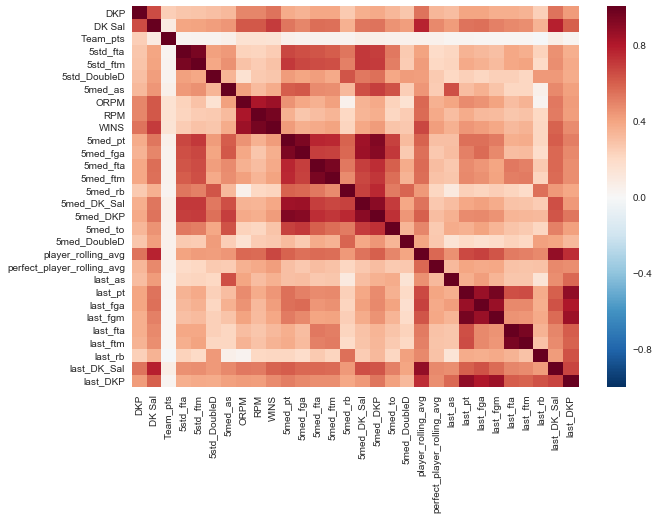

In [1256]:
# Perform a heatmap on correlation.corr()

plt.figure(figsize = (10,7))

ax = sns.heatmap(correlation.corr())

In [1156]:
# Below are the highest correlated features to 'DKP':

# 'DK Sal',
# 'Team_pts',
# '5std_fta',
# '5std_ftm',
# '5std_DoubleD',
# '5med_as',
# 'ORPM',
# 'RPM',
# 'WINS',
# '5med_pt',
# '5med_fga',
# '5med_fta',
# '5med_ftm',
# '5med_rb',
# '5med_DK_Sal',
# '5med_DKP',
# '5med_to',
# '5med_DoubleD',
# 'player_rolling_avg',
# 'perfect_player_rolling_avg',
# 'last_as',
# 'last_pt',
# 'last_fga',
# 'last_fgm',
# 'last_fta',
# 'last_ftm',
# 'last_rb',
# 'last_DK_Sal',
# 'last_DKP'

# Models  - Simple Linear Regression & Keras

## Simple Linear Regression

In [992]:
# Assign linearRegression to variable "lm"

lm = linear_model.LinearRegression()

# highly correlated features

X = nba2017train[[
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]
y = nba2017train['DKP'] 

model = lm.fit(X, y)

# fit = training

In [993]:
# R^2 1 is great. 0 is the worst. Somewhere in between.

model.score(X,y)

0.48790716034315945

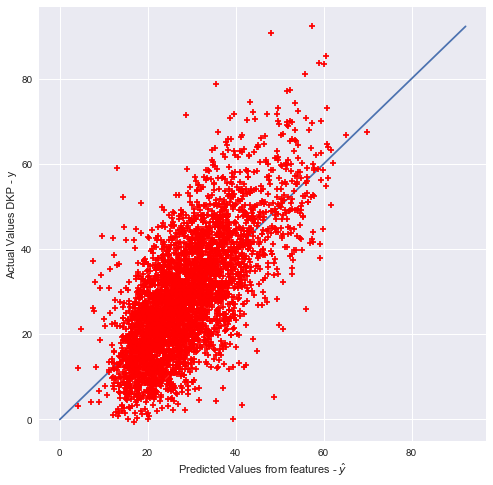

In [994]:
# Y- Y_hat
predictions = model.predict(X)


# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features - $\hat{y}$")
plt.ylabel("Actual Values DKP - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

## Keras 

In [995]:
# View the tail of the training data.
 
nba2017train.tail()

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
154,4952,2017-12-12,Marquese Chriss,4100,15,14,92.0,1,0,22.97,...,3900.0,17.50,0.0,0.0,0.0,1.0,0.0,0.0,22.53,4.13
156,4904,2017-12-12,Dario Saric,5700,27,8,118.0,1,0,39.87,...,5300.0,28.75,0.0,0.0,2.0,1.0,0.0,0.0,30.78,4.19
157,4522,2017-12-12,Will Barton,7400,9,24,103.0,1,0,34.38,...,6900.0,45.50,0.0,1.0,1.0,3.0,0.0,0.0,41.25,4.16
161,4607,2017-12-12,Mason Plumlee,4500,9,24,103.0,1,0,29.00,...,4500.0,19.00,1.0,0.0,2.0,0.0,0.0,0.0,20.78,3.74
99,3307,2017-12-12,Tyson Chandler,4500,15,14,92.0,1,0,29.35,...,4300.0,15.25,0.0,0.0,0.0,0.0,0.0,0.0,26.22,3.56


In [996]:
# Train, Test Split highly correlated features from nba2017train.
# Assign 'DKP' to the target.

X_train, X_test, y_train, y_test = \
train_test_split(nba2017train[[

'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']],

nba2017train['DKP']            
            )
    
ss = StandardScaler()

In [997]:
# Fit and transform the training data.

X_train = ss.fit_transform(X_train) # only fit the train, not the test
X_test = ss.transform(X_test)

In [998]:
# View the shape of X_train

X_train.shape

(2835, 29)

In [999]:
# View the shape of X_test

X_test.shape

(946, 29)

In [1000]:
# Setup the Keras model.

model = Sequential()

In [1001]:
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [1002]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [1003]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=55)

Train on 2835 samples, validate on 946 samples
Epoch 1/55
2835/2835 [==============================] - 1s 217us/step - loss: 751.9046 - mean_absolute_error: 24.1234 - val_loss: 493.8308 - val_mean_absolute_error: 18.9117
Epoch 2/55
2835/2835 [==============================] - 0s 103us/step - loss: 346.7059 - mean_absolute_error: 15.2567 - val_loss: 249.7381 - val_mean_absolute_error: 12.8537
Epoch 3/55
2835/2835 [==============================] - 0s 90us/step - loss: 222.0423 - mean_absolute_error: 11.9568 - val_loss: 179.4425 - val_mean_absolute_error: 10.7829
Epoch 4/55
2835/2835 [==============================] - 0s 86us/step - loss: 159.9650 - mean_absolute_error: 10.0094 - val_loss: 134.2560 - val_mean_absolute_error: 9.2508
Epoch 5/55
2835/2835 [==============================] - 0s 71us/step - loss: 130.4855 - mean_absolute_error: 8.9962 - val_loss: 118.9141 - val_mean_absolute_error: 8.6954
Epoch 6/55
2835/2835 [==============================] - 0s 69us/step - loss: 120.1373 - m

2835/2835 [==============================] - 0s 104us/step - loss: 90.8711 - mean_absolute_error: 7.4130 - val_loss: 98.1330 - val_mean_absolute_error: 7.8686
Epoch 49/55
2835/2835 [==============================] - 0s 100us/step - loss: 90.5520 - mean_absolute_error: 7.3973 - val_loss: 98.0330 - val_mean_absolute_error: 7.8772
Epoch 50/55
2835/2835 [==============================] - 0s 106us/step - loss: 90.1683 - mean_absolute_error: 7.3915 - val_loss: 97.6413 - val_mean_absolute_error: 7.8750
Epoch 51/55
2835/2835 [==============================] - 0s 109us/step - loss: 90.0553 - mean_absolute_error: 7.3808 - val_loss: 97.7301 - val_mean_absolute_error: 7.8761
Epoch 52/55
2835/2835 [==============================] - 0s 104us/step - loss: 90.3358 - mean_absolute_error: 7.3910 - val_loss: 98.7996 - val_mean_absolute_error: 7.9209
Epoch 53/55
2835/2835 [==============================] - 0s 104us/step - loss: 90.0926 - mean_absolute_error: 7.3968 - val_loss: 97.9856 - val_mean_absolute_

In [1004]:
y_pred = model.predict(X_test)

In [1005]:
y_pred.shape

(946, 1)

In [1006]:
r2_score(y_test, y_pred)

0.50017279627213829

In [1007]:
list(zip(X_test, y_test, y_pred))[:5]

[(array([ 1.27558668, -0.1159516 ,  3.08376592,  2.91323371, -0.63897693,
          1.66502069,  0.9658539 ,  0.21660515,  0.46898044,  1.75768559,
          1.22756867,  0.02114069,  0.28844828,  0.57304005,  1.13228072,
          1.36985715,  0.52036761, -0.28138545,  1.12036965, -0.12732249,
          0.44791775,  0.55231949,  0.76818455,  0.6617488 ,  0.99009348,
         -0.0683531 ,  0.20826024,  1.23858324,  0.38659962]),
  23.75,
  array([ 39.74804306], dtype=float32)),
 (array([ 0.67048519,  0.37874032,  0.45989133,  0.15562133, -0.63897693,
          1.66502069,  0.33433805,  1.60196404,  1.61846164, -0.67383594,
         -0.40355112,  0.02114069,  0.28844828,  0.86591341,  0.99352923,
          0.79483113, -0.2639185 , -0.28138545,  0.56608132,  0.29376856,
         -1.01251562, -1.49198772, -1.75028343, -1.49996396, -0.86428773,
         -0.8151008 , -1.3359885 ,  0.83710383, -1.79368026]),
  31.75,
  array([ 39.74029922], dtype=float32)),
 (array([-0.03546656, -0.69309218,

In [1008]:
# View the shape of y_test

y_test.shape

(946,)

In [1009]:
# Run the entire dataset

X = nba2017train[[

'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]


                


In [1010]:
y = nba2017train['DKP']

In [1011]:
ss= StandardScaler()

In [1012]:
X = ss.fit_transform(X)

In [1013]:
model = Sequential()

In [1014]:
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [1015]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [1016]:
history = model.fit(X, y, epochs=55)

Epoch 1/55
3781/3781 [==============================] - 1s 201us/step - loss: 978.9515 - mean_absolute_error: 28.2209
Epoch 2/55
3781/3781 [==============================] - 0s 100us/step - loss: 600.5681 - mean_absolute_error: 21.4134
Epoch 3/55
3781/3781 [==============================] - 0s 98us/step - loss: 292.5650 - mean_absolute_error: 13.8678
Epoch 4/55
3781/3781 [==============================] - 0s 107us/step - loss: 215.5013 - mean_absolute_error: 11.7938
Epoch 5/55
3781/3781 [==============================] - 0s 63us/step - loss: 161.4913 - mean_absolute_error: 10.0879
Epoch 6/55
3781/3781 [==============================] - 0s 77us/step - loss: 131.4426 - mean_absolute_error: 9.0663
Epoch 7/55
3781/3781 [==============================] - 0s 75us/step - loss: 120.2280 - mean_absolute_error: 8.6446
Epoch 8/55
3781/3781 [==============================] - 0s 70us/step - loss: 114.1845 - mean_absolute_error: 8.4210
Epoch 9/55
3781/3781 [==============================] - 0s 88us/

In [1017]:
from sklearn.metrics import r2_score

In [1018]:
r2_score(y_test, y_pred)

0.50017279627213829

In [1019]:
nba2017test.head() 

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
9188,4709,2017-12-13,Bojan Bogdanovic,4700,23,7,0.0,1,1,0.0,...,4800.0,15.25,0.0,0.0,1.0,2.0,0.0,0.0,35.35,4.65
9212,4699,2017-12-13,Elfrid Payton,7200,20,17,0.0,1,1,0.0,...,6500.0,25.25,0.0,1.0,1.0,1.0,0.0,0.0,31.83,2.60
9199,4085,2017-12-13,Ryan Anderson,4300,1,3,0.0,1,1,0.0,...,4700.0,8.75,0.0,0.0,1.0,1.0,0.0,0.0,17.63,4.79
9197,4701,2017-12-13,Joe Ingles,5000,5,25,0.0,1,0,0.0,...,4900.0,26.00,0.0,1.0,2.0,3.0,0.0,0.0,32.82,4.88
9194,4943,2017-12-13,Alex Abrines,3300,7,23,0.0,1,0,0.0,...,3300.0,12.50,0.0,1.0,1.0,1.0,0.0,0.0,25.60,2.49


In [1020]:
X_new = nba2017test[[

'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]   
    



In [1021]:
X_new = ss.transform(X_new)
new_data_preds = model.predict(X_new)

In [1022]:
pred = model.predict(X_new)

In [1023]:
import pandas as pd

In [1024]:
check3 = pd.DataFrame(list(zip(nba2017test['GID'], nba2017test['DK pos'], nba2017test['Date'],nba2017test['DK Sal'], nba2017test['Name'], nba2017test['Team'],new_data_preds)))

In [1025]:
check3[6].value_counts().head()

[17.8657]    1
[15.7479]    1
[18.2559]    1
[17.3756]    1
[18.3319]    1
Name: 6, dtype: int64

In [1159]:
check4 = check3.loc[check3[6] > 0, :]
check4.sort_values([6], ascending=False).head(250
                                )

,0,1,2,3,4,5,6
13,4224,12,2017-12-13,11600,James Harden,1,[36.9452]
57,4482,45,2017-12-13,10200,Anthony Davis,11,[36.7536]
62,4079,1,2017-12-13,11200,Russell Westbrook,7,[33.5823]
52,4274,45,2017-12-13,11000,DeMarcus Cousins,11,[31.9788]
23,4321,1,2017-12-13,7900,John Wall,19,[31.4576]
39,4621,34,2017-12-13,11300,Giannis Antetokounmpo,22,[28.9625]
19,4627,12,2017-12-13,9200,Victor Oladipo,23,[27.2567]
45,4523,1,2017-12-13,9000,Damian Lillard,6,[25.4744]
70,4228,1,2017-12-13,5800,Darren Collison,23,[24.713]
30,4373,5,2017-12-13,8800,Nikola Vucevic,20,[22.4816]


# Solving the Knapsack Problem with Pulp

"The knapsack problem or rucksack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items."

https://en.wikipedia.org/wiki/Knapsack_problem

### The Knapsack Problem in this case is:
#####  1) Find the optimal predicted DraftKing Points on a particular day.
#####  2) Stay under the salary cap of $50,000.
#####  3) Pick one PG, SG, SF, PF, C, G, F and UTIL player.
  


### Card Example

<img src='DKCard.png' width="70%" height="70%"/>



In [1160]:
# Import Pulp 

from pulp import *


https://pythonhosted.org/PuLP/

In [1161]:
pulp.pulpTestAll()
      

	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing column based modelling
	 Testing dual variables and slacks reporting
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
* Solver <class 'pulp.solvers.PULP_CBC_CMD'> passed.
Solver <class 'pulp.solvers.CPLEX_DLL'> un

In [1244]:
# This code, up to the pydfs_lineup_optimizer, preps the data for the pydfs_lineup_optimizer

players = check3[[1, 4, 3, 0, 6, 5]]

# Rename 'DK Pos' column to 'Position'.
# Rename 'DK Sal' column to 'Salary'
# Rename 'GID' column to 'GameInfo'
# Rename 'new_data_preds' to 'AvgPointsPerGame'
# Rename 'Team' to teamAbbrev

players.columns = ['Position', 'Name', 'Salary', 'GameInfo', 'AvgPointsPerGame', 'teamAbbrev']

# View the head of 'players'

players.head()



,Position,Name,Salary,GameInfo,AvgPointsPerGame,teamAbbrev
0,23,Bojan Bogdanovic,4700,4709,[18.2722],23
1,1,Elfrid Payton,7200,4699,[16.7863],20
2,45,Ryan Anderson,4300,4085,[15.1969],1
3,23,Joe Ingles,5000,4701,[15.7479],5
4,23,Alex Abrines,3300,4943,[18.188],7


In [1163]:
players.dtypes

Position             int64
Name                object
Salary               int64
GameInfo             int64
AvgPointsPerGame    object
teamAbbrev           int64
dtype: object

In [1164]:

players['GameInfo'] = players['GameInfo'].astype(str)




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1165]:
# Convert Teams from numbers to uppercase Team Names

players['teamAbbrev'] = players['teamAbbrev'].map(lambda x: 'BOS' if x == 30 else 'BKN' if x == 29 else 'NYK' if x == 28 else 'PHI' if x == 27 else 'TOR' if x == 26 else 'CHI' if x == 25 else 'DET' if x == 24 else 'IND' if x == 23 else 'MIL' if x == 22 else 'ATL' if x == 21 else 'ORL' if x == 20 else 'WAS' if x == 19 else 'GSW' if x == 18 else 'LAC' if x == 17 else 'LAL' if x == 16 else 'PHO' if x == 15 else 'SAC' if x == 14 else 'DAL' if x == 13 else 'MEM' if x == 12 else 'NOR' if x == 11 else 'SAS' if x == 10 else 'DEN' if x == 9 else 'MIN' if x == 8 else 'OKC' if x == 7 else 'POR' if x == 6 else 'UTA' if x == 5 else 'CLE' if x == 4 else 'CHA' if x == 3 else 'MIA' if x == 2 else 'HOU' if x == 1 else 0) 




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1166]:
# Convert 'DK Pos' to string through a lambda function.
# These are the multiple player options (1 2 3 4 5 12 13 14 15 23 24 25 34 35 45)

players['Position'] = players['Position'].map(lambda x: 'PG' if x == 1 else 'SG' if x == 2 else 'SF' if x == 3 else 'PF' if x == 4 else 'C' if x == 5 else 'PG/SG' if x == 12 else 'PG/SF' if x == 13 else 'PG/PF' if x == 14 else 'PG/C' if x == 15 else 'SG/SF' if x == 23 else 'SG/PF' if x == 24 else 'SF/PF' if x == 34 else 'SF/C' if x == 35 else 'PF/C' if x == 45 else 0)




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1167]:
players['teamAbbrev'] = players['teamAbbrev'].astype(str)
players['Position'] = players['Position'].astype(str)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1168]:
players.dtypes

Position            object
Name                object
Salary               int64
GameInfo            object
AvgPointsPerGame    object
teamAbbrev          object
dtype: object

In [1169]:
players.head()

,Position,Name,Salary,GameInfo,AvgPointsPerGame,teamAbbrev
0,SG/SF,Bojan Bogdanovic,4700,4709,[18.2722],IND
1,PG,Elfrid Payton,7200,4699,[16.7863],ORL
2,PF/C,Ryan Anderson,4300,4085,[15.1969],HOU
3,SG/SF,Joe Ingles,5000,4701,[15.7479],UTA
4,SG/SF,Alex Abrines,3300,4943,[18.188],OKC


In [1170]:
players['AvgPointsPerGame'] = players['AvgPointsPerGame'].astype(float).round(decimals=3)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1171]:
players

,Position,Name,Salary,GameInfo,AvgPointsPerGame,teamAbbrev
0,SG/SF,Bojan Bogdanovic,4700,4709,18.272,IND
1,PG,Elfrid Payton,7200,4699,16.786,ORL
2,PF/C,Ryan Anderson,4300,4085,15.197,HOU
3,SG/SF,Joe Ingles,5000,4701,15.748,UTA
4,SG/SF,Alex Abrines,3300,4943,18.188,OKC
5,PG,Rajon Rondo,6300,3872,11.997,NOR
6,C,Rudy Gobert,6600,4620,21.691,UTA
7,SG/SF,DeMar DeRozan,8300,4211,20.805,TOR
8,SG/SF,Denzel Valentine,4600,4901,15.142,CHI
9,SF/PF,James Johnson,5600,4168,16.425,MIA


In [1245]:
players.to_csv('DKSalaries.csv', index=False, quoting=2) 
# quoting = 2 is QUOTE_NONNUMERIC. Need this to be in the correct format to run pydfs_lineup_optimizer.

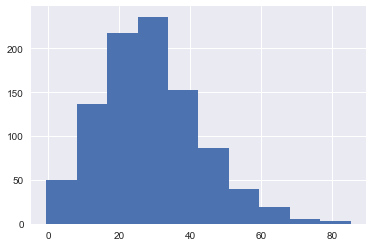

In [1173]:
plt.hist(y_test);

In [1174]:
from pydfs_lineup_optimizer import Site, Sport, get_optimizer


optimizer = get_optimizer(Site.DRAFTKINGS, Sport.BASKETBALL)
optimizer.load_players_from_CSV("DKSalaries.csv")
lineup_generator = optimizer.optimize(1)
for lineup in lineup_generator:
    print(lineup)

1. Alex Abrines                  SG/SFOKC            18.188  3300.0$   
2. James Harden                  PG/SGHOU            36.945  11600.0$  
3. John Wall                     PG   WAS            31.458  7900.0$   
4. Jamil Wilson                  SF/PFLAC            14.725  3000.0$   
5. Wesley Johnson                SG/SFLAC            17.866  4100.0$   
6. Anthony Davis                 PF/C NOR            36.754  10200.0$  
7. Darren Collison               PG   IND            24.713  5800.0$   
8. Evan Turner                   SG/SFPOR            16.745  4000.0$   
Fantasy Points 197.39399999999998
Salary 49900.0


<img src='DKCard.png.png' width="80%" height="80%"/>

<img src='DKCard.pngpng' width="80%" height="80%"/>

##### Credit to Dima Kudosh for supplying pydfs-lineup-optimzer, which I tweaked to make if work efficiently with my predicted data.

https://github.com/DimaKudosh/pydfs-lineup-optimizer

In [1175]:
nba2017test.tail()

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,5med_minutes,DKPavgper1k
9269,4280,2017-12-13,Derrick Favors,5500,5,25,0.0,1,0,0.0,...,6500.0,19.25,1.0,1.0,1.0,0.0,0.0,0.0,26.95,4.75
9273,4483,2017-12-13,Austin Rivers,5900,17,20,0.0,1,0,0.0,...,6100.0,29.50,0.0,1.0,2.0,3.0,0.0,0.0,35.87,4.36
9274,3990,2017-12-13,Marc Gasol,7600,12,19,0.0,1,0,0.0,...,7900.0,34.50,1.0,0.0,3.0,1.0,0.0,0.0,34.97,5.18
9283,5233,2017-12-13,Milos Teodosic,3900,17,20,0.0,1,0,0.0,...,3800.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.48
9346,4583,2017-12-13,Kelly Olynyk,5400,2,6,0.0,1,1,0.0,...,4700.0,24.25,1.0,1.0,2.0,1.0,0.0,0.0,28.07,3.77


# Charting Performance

### We'll use the 5,000+ entrants, $3 average score of 262.67 as the DraftKings points amount that needs to be reached in order to be profitable.



<img src='Top20ByBuyInDK.png' width="80%" height="80%"/>

https://rotogrinders.com/articles/what-it-really-takes-to-win-an-nba-gpp-1210935

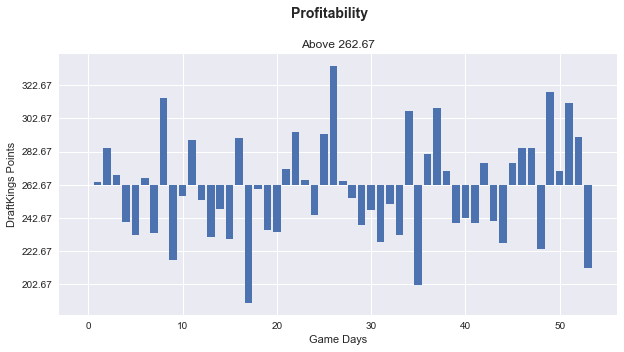

In [1246]:
# Chart Results

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig = plt.figure(figsize=(10,5))


fig.suptitle('Profitability', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Above 262.67')

ax.set_xlabel('Game Days')
ax.set_ylabel('DraftKings Points')

baseline = 262.67

# data = 53 days of optimized results
data = [
  262.5,
  264.25,
  285,
  268.5,
  240,
  232.5,
  266.75,
  233.75,
  314.75,
  217.25,
  256,
  289.75,
  253.25,
  231.25,
  248.25,
  230.25,
  290.75,
  191.5,
  260.25,
  235.5,
  234,
  272.25,
  294.25,
  265.5,
  244.5,
  293.5,
  334.5,
  265,
  254.75,
  238.25,
  247.5,
  228.25,
  251.25,
  232.5,
  307.25,
  202.25,
  281,
  309,
  271,
  239.75,
  242.75,
  239.5,
  276,
  241,
  227.75,
  276,
  285,
  285,
  224,
  318.5,
  271,
  312,
  291.75,
  212.75,
]


plt.bar(range(len(data)),[x-baseline for x in data])
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+baseline))



plt.show()

# Findings

Although the predicted winnings days were slightly lower than the losing days (25/28), the tournament style of play made the model a profitable one. In one case, an 8 USD wager would have generated a second place finish, which would have generated a prize of 40,000 USD. Below is an example of the prize payout structure.

<img src='payouts.png' width="30%" height="30%"/>

# Next Steps

## Bayes and PyMC3

In [1236]:
from pymc3 import Model, Normal, HalfNormal

In [1237]:
y = nba2017train['DKP']

In [1238]:
basic_model = Model()

with basic_model:

    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=20)
    sigma = HalfNormal('sigma', sd=1)

    mu = alpha + beta[0]*nba2017train['5std_fta'] + beta[1]*nba2017train['5std_ftm']\
    + beta[2]*nba2017train['5med_as'] + beta[3]*nba2017train['ORPM'] + beta[4]*nba2017train['RPM']\
    + beta[5]*nba2017train['WINS'] + beta[6]*nba2017train['5med_pt'] + beta[7]*nba2017train['5med_fga']\
    + beta[8]*nba2017train['5med_fta'] + beta[9]*nba2017train['5med_ftm'] + beta[10]*nba2017train['5med_rb']\
    + beta[11]*nba2017train['5med_DKP'] + beta[12]*nba2017train['5med_to'] + beta[13]*nba2017train['5med_DoubleD']\
    +  beta[14]*nba2017train['perfect_player_rolling_avg'] + beta[15]*nba2017train['last_as']\
    + beta[16]*nba2017train['last_pt'] + beta[17]*nba2017train['last_fgm'] + beta[18]*nba2017train['last_fta']\
    + beta[19]*nba2017train['last_ftm']
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=y)

In [1239]:
from pymc3 import find_MAP
map_estimate = find_MAP(model=basic_model)
print(map_estimate)

logp = -14,481, ||grad|| = 0.57509: 100%|██████████| 464/464 [00:01<00:00, 252.03it/s] 


{'alpha': array(15.763840474770177), 'beta': array([ 0.69563889, -0.84169342,  0.15273092,  1.42614826, -1.24240869,
        6.56724049, -0.22585626,  0.25994479,  0.29496942,  0.20742375,
        0.3815497 , -0.0897019 ,  0.83072897,  2.29180996,  3.47971833,
        0.17221366, -1.09503735,  2.73062605,  0.81475488,  0.55557696]), 'sigma_log__': array(2.3628328948106736), 'sigma': array(10.620997041746781)}


In [1241]:
from pymc3 import NUTS, sample

with basic_model:
    trace = sample(500, start=map_estimate)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [50:18<00:00,  3.02s/it] 


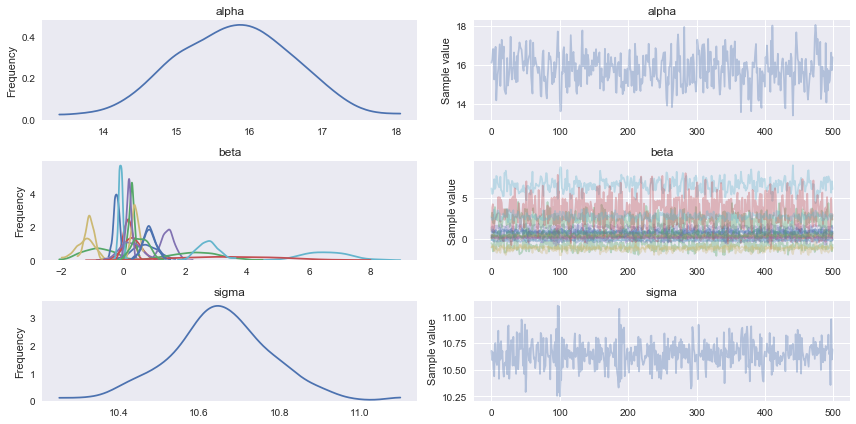

In [1243]:
from pymc3 import traceplot
traceplot(trace);